# Домашнее задание - 3.

## Часть 1. Теория (5 баллов + бонус).

**Задание 1.** Найдите SVD-разложение матриц (каждый пункт - **0.5 балла**):

![задание 1](task1.png)

![solution](../images/MLHL_HW3.1.png)

**Задание 2. (2 балла)** Изучите материалы про QR, LU, SVD и спектральное разложение матриц. Напишите формулу для одного любого разложения (кроме SVD), поясните её, объясните геометрический смысл разложения и его связь с SVD.

![solution](../images/MLHL_HW3.2.png)


**Бонус.** За самостоятельную реализацию алгоритма, осуществляющего выбранное вами разложение в python - **до +3 баллов**.

In [64]:
import numpy as np
from numpy.linalg import eig, inv
from sklearn.preprocessing import normalize

def eigen_decomposition(input_matrix):
    eigen_values,U = eig(input_matrix)
    D = np.diag(eigen_values)
    U_inv = inv(U)

    return (U, D, U_inv)

Протестируем, что получилось:

In [65]:
A = np.array([[0,1,1],[2,1,0],[3,4,5]])

(U, D, U_inv) = eigen_decomposition(A)

print('Test: U * D * U-inv')
print(np.dot(U,np.dot(D, U_inv)))

Test: U * D * U-inv
[[ 6.57231804e-16  1.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00  1.00000000e+00 -1.53739486e-16]
 [ 3.00000000e+00  4.00000000e+00  5.00000000e+00]]


**Задание 3. (1 балл)** Некто придумал метод __бесполезных компонент__. Как и в методе главных компонент, новые признаки являются линейными комбинациями исходных. Бесполезные компоненты так же, как и главные - ортогональны между собой и имеют длину 1. В отличие от метода главных компонент, проекция на первую бесполезную компоненту обладает __наименьшей__ дисперсией. Вторая бесполезная компонента ортогональна первой и обладает наименьшей дисперсией при условии ортогональности. И так далее.

Как связаны метод бесполезных компонент и метод главных компонент?

Основное отличие в том, что метод бесполезных компонент теряет максимальное колличество информации о признаках выбрки с уменьшением размерности.

![pca-invesred](../images/PCA_inversed.png)

На графике зеленым показано, как метод бесполезных компонент снача выбирает наименее информативные компоненты.

## Практика (6 баллов)

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

Загрузим картинку и нарисуем ее.

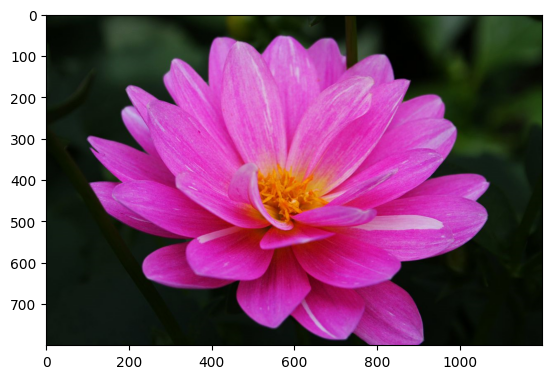

In [67]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [68]:
img.shape

(800, 1200, 3)

Разобъем изображение на цветовые каналы.

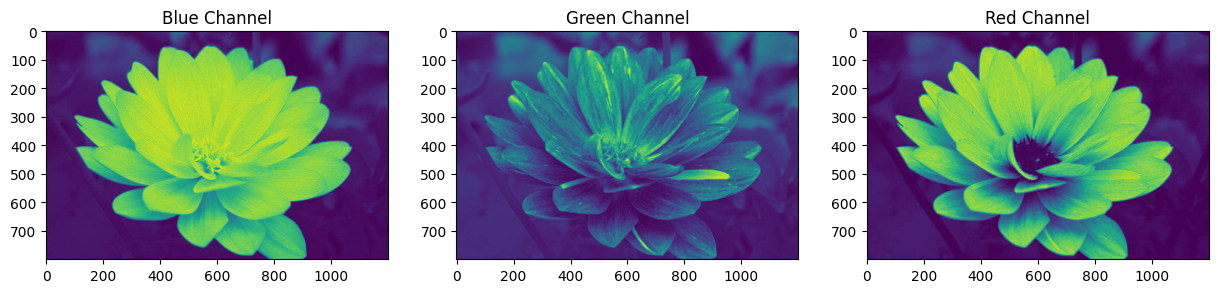

In [69]:
blue,green,red = cv2.split(img)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

Посмотрим на матрицу одного из каналов.

In [70]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,10,10,10,10,10,11,11,11,11,11,...,9,9,9,9,9,9,9,9,9,9
1,10,10,10,10,10,11,11,11,11,11,...,9,9,9,9,9,9,9,9,9,9
2,10,10,10,10,10,11,11,11,11,11,...,7,7,7,7,7,7,7,7,7,7
3,10,10,10,10,10,11,11,11,11,11,...,7,7,6,6,6,6,6,6,6,6
4,10,10,10,10,10,11,11,11,11,11,...,7,7,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,12,12,12,12,12,12,12,12,13,13,...,7,7,7,7,7,7,7,7,7,7
796,12,12,12,12,12,12,12,12,13,13,...,7,7,7,7,7,7,7,7,7,7
797,13,13,13,13,13,13,13,13,13,13,...,7,7,7,7,7,7,7,7,7,7
798,13,13,13,13,13,13,13,13,13,13,...,7,7,7,7,7,7,7,7,7,7


### Сейчас будем делать PCA

**Задание 4 (0.5 балла).** Масштабируйте данные, поделив значения в таблицах каждого канала на 255

In [71]:
blue = blue / 255
green = green / 255
red = red / 255

**Задание 5 (1 балл).** Обучите PCA с 50-ю компонентами на каждом канале в отдельности (три раза обучаем). Снизьте размерность каждого канала в отдельности.

In [72]:
pca_blue = PCA(n_components=50)
blue_pca = pca_blue.fit_transform(blue)

pca_green = PCA(n_components=50)
green_pca = pca_green.fit_transform(green)

pca_red = PCA(n_components=50)
red_pca = pca_red.fit_transform(red)


**Задание 6 (0.5 балла).** Выведите на экран долю дисперсии, объясняемой первыми 50-ю главными компонентами (для каждого канала в отдельности).

In [73]:
print('Blue')
per_var_blue = np.round(pca_blue.explained_variance_ratio_ * 100, decimals=1)
per_var_blue

Blue


array([54.6, 12.2,  8.7,  4.6,  3.5,  2.8,  2. ,  1.5,  1.4,  0.9,  0.9,
        0.7,  0.7,  0.6,  0.5,  0.4,  0.4,  0.3,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [74]:
print('Green')
per_var_green = np.round(pca_green.explained_variance_ratio_ * 100, decimals=1)
per_var_green

Green


array([42.2, 13. ,  9.1,  5.4,  4.2,  3.3,  2.6,  1.8,  1.5,  1.5,  1.2,
        1. ,  0.9,  0.8,  0.7,  0.6,  0.6,  0.5,  0.5,  0.4,  0.4,  0.4,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [75]:
print('Red')
per_var_red = np.round(pca_green.explained_variance_ratio_ * 100, decimals=1)
per_var_red

Red


array([42.2, 13. ,  9.1,  5.4,  4.2,  3.3,  2.6,  1.8,  1.5,  1.5,  1.2,
        1. ,  0.9,  0.8,  0.7,  0.6,  0.6,  0.5,  0.5,  0.4,  0.4,  0.4,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

**Задание 7 (0.5 балла).** Нарисуйте для каждого из трех каналов гистограмму, на которой отобразите долю дисперсии, объясняемой каждой из первых 50-ти компонент.

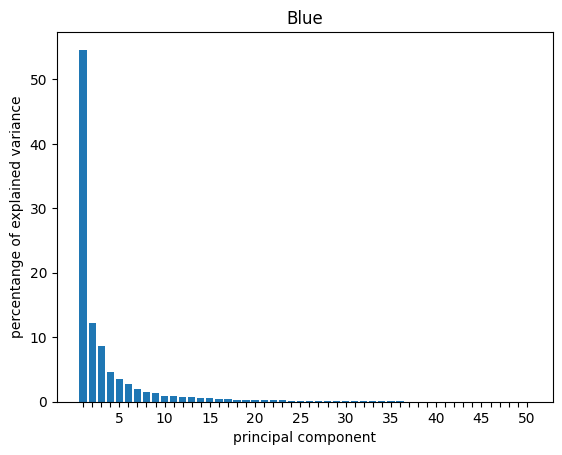

In [76]:
labels = [str(x) if x % 5 == 0 else '' for x in range(1, len(per_var_blue) + 1)]
plt.bar(x=range(1, len(per_var_blue)+1), height=per_var_blue, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('Blue')
plt.show()

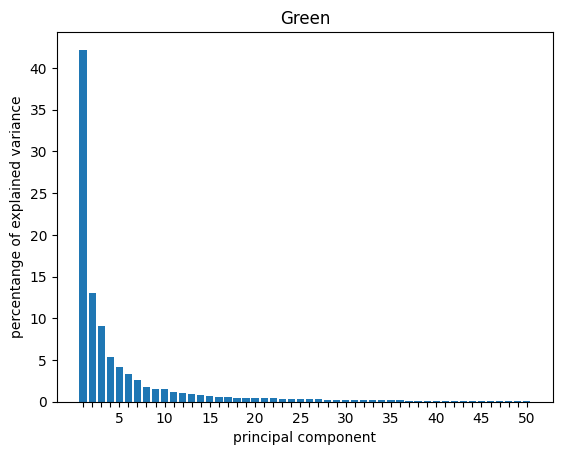

In [77]:
labels = [str(x) if x % 5 == 0 else '' for x in range(1, len(per_var_green) + 1)]
plt.bar(x=range(1, len(per_var_green)+1), height=per_var_green, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('Green')
plt.show()

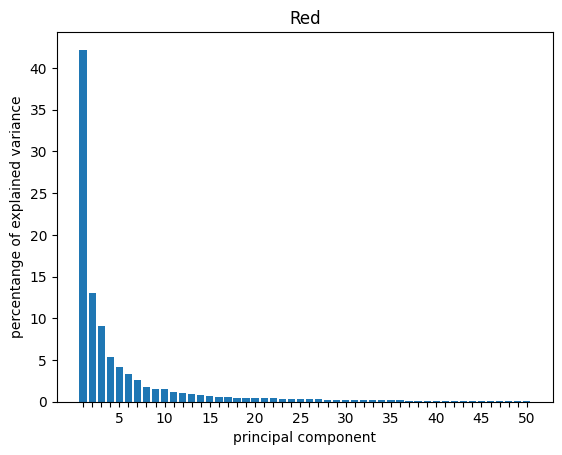

In [78]:
labels = [str(x) if x % 5 == 0 else '' for x in range(1, len(per_var_red) + 1)]
plt.bar(x=range(1, len(per_var_red)+1), height=per_var_red, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('Red')
plt.show()

### Восстанавливаем изображение

**Задание 8 (1 балл).** Восстановите изображения по каждому каналу в отдельности, используя pca.inverse_transform.

In [83]:
inverse_blue = pca_blue.inverse_transform(blue_pca)
inverse_green = pca_green.inverse_transform(green_pca)
inverse_red = pca_red.inverse_transform(red_pca)

**Задание 9 (0.5 балла).** Склейте восстановленные одноканальные изображения в цветное трехканальное изображение. Вы получите сжатое изображение

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


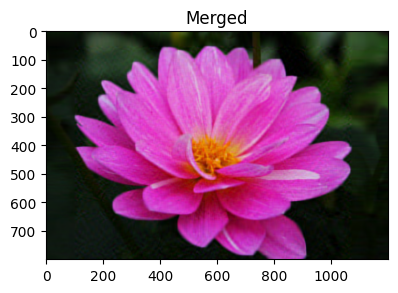

In [84]:
merged = cv2.merge([inverse_blue, inverse_green, inverse_red])

**Задание 10 (1 балл).** Нарисуйте рядом два изображения: исходное и восстановленное (по своим 50 компонентам). Прокомментируйте текстом результат - упало ли визуально качество при сжатии изображения до 50 главных компонент?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


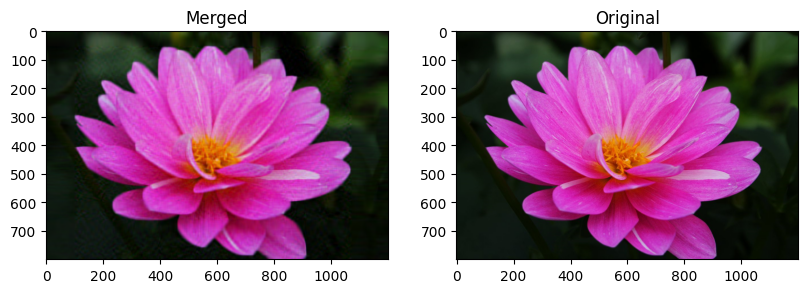

In [89]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Merged")
plt.imshow(merged)

img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
fig.add_subplot(132)
plt.title("Original")
plt.imshow(img)

plt.show()

Да качество после сжатия упало. Полученное изображение кажется боллее "зернистым"

**Задание 11 (1 балл).** Подберите минимальное количество компонент, при которых сжатое изображение визуально не отличается от исходного. Подбор происходит перебором, ориентируемся на визуальный результат.

In [1]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)

for i in range(80, 100):
    pca_blue = PCA(n_components=i)
    blue_pca = pca_blue.fit_transform(blue)

    pca_green = PCA(n_components=i)
    green_pca = pca_green.fit_transform(green)

    pca_red = PCA(n_components=i)
    red_pca = pca_red.fit_transform(red)

    inverse_blue = pca_blue.inverse_transform(blue_pca)
    inverse_green = pca_green.inverse_transform(green_pca)
    inverse_red = pca_red.inverse_transform(red_pca)

    merged = cv2.merge([inverse_blue, inverse_green, inverse_red])

    fig = plt.figure(figsize = (15, 7.2)) 
    fig.add_subplot(131)
    plt.title("Merged: {components:.0f} components".format(components = i))
    plt.imshow(merged)

    fig.add_subplot(132)
    plt.title("Original")
    plt.imshow(img)

    plt.show()

NameError: name 'cv2' is not defined